# One Hot Encoding

In [2]:
Text = "I am learning NLP"

In [8]:
# Below is the function from the pandas library to convert text to feature.
# Importing the library
import pandas as pd
# Generating the features
c =pd.get_dummies(Text.split())
c

,I,NLP,am,learning
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


In [7]:
c['NLP']

0    0
1    0
2    0
3    1
Name: NLP, dtype: uint8

# Converting Text to Features Using Count Vectorizing

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love NLP and I will learn NLP in 2month "]
# create the transform
vectorizer = CountVectorizer()
# tokenizing
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

{'love': 4, 'nlp': 5, 'and': 1, 'will': 6, 'learn': 3, 'in': 2, '2month': 0}
[[1 1 1 1 1 2 1]]


# Generating N-grams

In [12]:
Text = "I am learning NLP"

In [13]:
#Import textblob
from textblob import TextBlob
#For unigram : Use n = 1
TextBlob(Text).ngrams(1)

[WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]

In [14]:
#For Bigram : For bigrams, use n = 2
TextBlob(Text).ngrams(2)

[WordList(['I', 'am']),
 WordList(['am', 'learning']),
 WordList(['learning', 'NLP'])]

In [25]:
# Bigram-based features for a document
from sklearn.feature_extraction.text import CountVectorizer
text = ["I like NLP and I will learn NLP in 2months "]
vectorizer = CountVectorizer(ngram_range=(2,2))
# tokenizing
vectorizer.fit(text)
vector = vectorizer.transform(text)
vectorizer.get_feature_names_out()

array(['and will', 'in 2months', 'learn nlp', 'like nlp', 'nlp and',
       'nlp in', 'will learn'], dtype=object)

In [27]:
# summarize & generating output
print(vectorizer.vocabulary_)


{'like nlp': 3, 'nlp and': 4, 'and will': 0, 'will learn': 6, 'learn nlp': 2, 'nlp in': 5, 'in 2months': 1}


In [28]:
print(vector.toarray())

[[1 1 1 1 1 1 1]]


In [29]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?', ]

vectorizer = CountVectorizer(ngram_range=(2,2))
# tokenizing
vectorizer.fit(corpus)
vector = vectorizer.transform(corpus)
vectorizer.get_feature_names_out()

array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [30]:
print(vector.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


# Generating Co-occurrence Matrix

In [33]:
import numpy as np
import nltk
from nltk import bigrams
import itertools

In [35]:
def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word:i for i, word in enumerate(vocab) }
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    # Frequency distribution of bigrams ((word1, word2),num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
    # return the matrix and the index
    return co_occurrence_matrix,vocab_to_index

In [39]:
sentences =[['I', 'love', 'nlp'],
            ['I', 'love','to' 'learn'],
            ['nlp', 'is', 'future'],
            ['nlp', 'is', 'cool']]






{'And this is the third one.': 0,
 'This is the first document.': 1,
 'Is this the first document?': 2,
 'This document is the second document.': 3}

In [40]:
# create one list using many lists
merged = list(itertools.chain.from_iterable(sentences))
merged

['I',
 'love',
 'nlp',
 'I',
 'love',
 'tolearn',
 'nlp',
 'is',
 'future',
 'nlp',
 'is',
 'cool']

In [42]:
vocab = set(merged)
vocab = list(vocab)
vocab_to_index = { word:i for i, word in enumerate(vocab) }
vocab_to_index

{'I': 0, 'tolearn': 1, 'is': 2, 'nlp': 3, 'cool': 4, 'love': 5, 'future': 6}

In [43]:
matrix = co_occurrence_matrix(merged)
# generate the matrix
CoMatrixFinal = pd.DataFrame(matrix[0], index=vocab_to_index, columns=vocab_to_index)
print(CoMatrixFinal)

           I  tolearn   is  nlp  cool  love  future
I        0.0      0.0  0.0  1.0   0.0   0.0     0.0
tolearn  0.0      0.0  0.0  0.0   0.0   1.0     0.0
is       0.0      0.0  0.0  2.0   0.0   0.0     0.0
nlp      0.0      1.0  0.0  0.0   0.0   1.0     1.0
cool     0.0      0.0  1.0  0.0   0.0   0.0     0.0
love     2.0      0.0  0.0  0.0   0.0   0.0     0.0
future   0.0      0.0  1.0  0.0   0.0   0.0     0.0


# Hash Vectorizing

In [57]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

In [59]:
# Let’s create the HashingVectorizer of a vector size of 10.
# It created vector of size 10 and now this can be used for any
# supervised/unsupervised tasks.

# transform
vectorizer = HashingVectorizer(n_features=10)
# create the hashing vector
vector = vectorizer.transform(text)
# summarize the vector
print(vectorizer.get_params(deep=True))
print(vector.shape)
print(vector.toarray()) 

{'alternate_sign': True, 'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'n_features': 10, 'ngram_range': (1, 1), 'norm': 'l2', 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None}
(1, 10)
[[ 0.          0.57735027  0.          0.          0.          0.
   0.         -0.57735027 -0.57735027  0.        ]]


In [53]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',]
    
vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)
print(X.shape)
X.toarray()


(4, 16)


array([[-0.57735027,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.57735027,  0.        ,
         0.        ,  0.        ,  0.        ,  0.57735027,  0.        ,
         0.        ],
       [-0.81649658,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.40824829,  0.        ,  0.40824829,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.70710678,
         0.70710678,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.57735027,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.57735027,  0.        ,
         0.        ,  0.        ,  0.        ,  0.57735027,  0.        ,
         0.        ]])

# TF-IDF

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

Text = ["The quick brown fox jumped over the lazy dog.","The dog.", "The fox"]
#Create the transform
vectorizer = TfidfVectorizer()
#Tokenize and build vocab
vectorizer.fit(Text)
#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]


In [ ]:
# If you observe, “the” is appearing in all the 3 documents and it does not add much value,
# and hence the vector value is 1, which is less than all the other vector representations of the tokens.


# word embeddings

In [130]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [131]:
#Example sentences
sentences = [['I', 'love', 'nlp'],
            ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
            ['nlp', 'is', 'future'],
            [ 'nlp', 'saves', 'time', 'and', 'solves','lot', 'of', 'industry', 'problems'],
            ['nlp', 'uses', 'machine', 'learning']]

In [132]:
# training the model
skipgram = Word2Vec(sentences, vector_size =50, window = 3, min_count=1, sg = 1)
print(skipgram)


Word2Vec<vocab=21, vector_size=50, alpha=0.025>


In [133]:
print(skipgram.wv['nlp'] )

[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]


In [134]:
# save model
skipgram.save('skipgram.bin')
# load model
skipgram = Word2Vec.load('skipgram.bin')
skipgram

In [104]:
#T – SNE plot is one of the ways to evaluate word embeddings. Let’s
#generate it and see how it looks. # T – SNE plot

In [135]:
len(skipgram.wv)

21

In [137]:
list(skipgram.wv.index_to_key)

['nlp',
 'I',
 'future',
 'love',
 'will',
 'learn',
 'in',
 '2',
 'months',
 'is',
 'learning',
 'machine',
 'time',
 'and',
 'solves',
 'lot',
 'of',
 'industry',
 'problems',
 'uses',
 'saves']

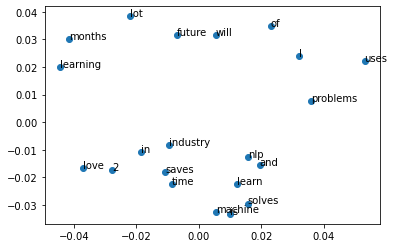

In [140]:
X = skipgram.wv[list(skipgram.wv.index_to_key)]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.index_to_key)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
# Import the gensim package and follow the steps to understand Google’s word2vec.


# import gensim package
import gensim
# load the saved model
model = gensim.models.Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
#Checking how similarity works.
print (model.similarity('this', 'is'))
print (model.similarity('post', 'book')) # it uses the vectors of both the words and calculates the similarity between them.


In [ ]:
# Finding the odd one out.
model.doesnt_match('breakfast cereal dinner lunch';.split()) # ‘cereal’, ‘dinner’ and ‘lunch', only cereal is the word that is not anywhere related to the remaining 3 words.


In [ ]:
word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])

# Implementing fastText

In [110]:
# Import FastText
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot
#Example sentences
sentences = [['I', 'love', 'nlp'],
             ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
             ['nlp', 'is', 'future'],
             [ 'nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
             ['nlp', 'uses', 'machine', 'learning']]

In [118]:
fast = FastText(sentences, vector_size= 20, window=1, min_count=1, workers=5, min_n=1, max_n=2)

In [119]:
print(fast.wv['nlp'])

[-0.01044169 -0.00166992  0.00851491 -0.00545158 -0.01564237  0.01678065
  0.00298395  0.00162992 -0.01518791  0.00655623  0.01039656 -0.00142836
 -0.01665709  0.00949577  0.00262534 -0.00541661  0.0063507  -0.00105192
 -0.02014117  0.00102295]


In [120]:
print(fast.wv['deep']) 
#  since fastText is building on character level, even for the word that was not
# there in training, it will provide results. You can see the vector for the word
# “deep,” but it's not present in the input data.

[-0.00718654 -0.00310375 -0.00214245 -0.00143114 -0.00600196  0.00922425
  0.01241926 -0.00713524 -0.00693269 -0.00987075  0.01335533 -0.00810269
  0.01761531 -0.00716007 -0.00427308  0.00729467  0.01494505 -0.01626069
  0.01229173  0.01455308]


In [125]:
list(fast.wv.index_to_key)

['nlp',
 'I',
 'future',
 'love',
 'will',
 'learn',
 'in',
 '2',
 'months',
 'is',
 'learning',
 'machine',
 'time',
 'and',
 'solves',
 'lot',
 'of',
 'industry',
 'problems',
 'uses',
 'saves']

In [127]:
# load model
# fast = Word2Vec.load('fast.bin')
# visualize
X = fast.wv[list(fast.wv.index_to_key)]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

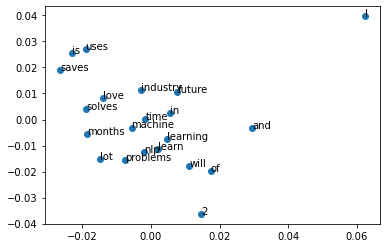

In [129]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(fast.wv.index_to_key)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
# The figure above shows the embedding representation for fastText.
# If you observe closely, the words “love” and “solve” are close together in
# fastText but in your skip-gram and CBOW, “love” and “learn” are near to
# each other. This is an effect of character-level embeddings.